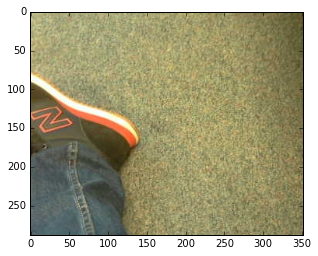

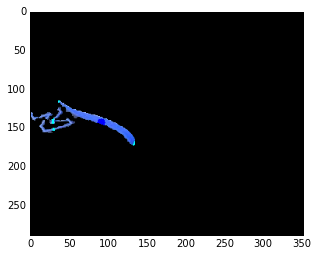

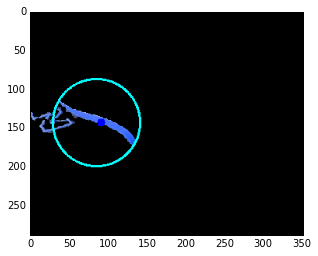

In [12]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
orig_img_path = '/home/xilinx/jupyter_notebooks/Examples/data/webcam.jpg'
'''
!fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2> /dev/null
'''
image = cv2.imread(orig_img_path)

img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

rgf = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgf)
plt.show()


# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

mask = mask0+mask1


output_img = cv2.bitwise_and(output_img, output_img, mask= mask)
plt.imshow(output_img)
plt.show()

cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
if len(cnts) > 0:
    c = max(cnts, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    M = cv2.moments(c)
    center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
    if radius > 10:
        cv2.circle(output_img, (int(x), int(y)), int(radius),(0, 255, 255), 2)
        cv2.circle(output_img, center, 5, (0, 0, 255), -1)
        

plt.imshow(output_img)
plt.show()

